Introduction to Machine Learning Systems
========================================

### [Eric Meissner](https://www.linkedin.com/in/meissnereric/)

### [Andrei Paleyes](https://www.linkedin.com/in/andreipaleyes/)

### [Neil D. Lawrence](http://inverseprobability.com)

### 2020-07-24

**Abstract**: This notebook introduces some of the challenges of
building machine learning data systems. It will introduce you to
concepts around joining of databases together. The storage and
manipulation of data is at the core of machine learning systems and data
science. The goal of this notebook is to introduce the reader to these
concepts, not to authoritatively answer any questions about the state of
Nigerian health facilities or Covid19, but it may give you ideas about
how to try and do that in your own country.

$$
\newcommand{\tk}[1]{}
%\newcommand{\tk}[1]{\textbf{TK}: #1}
\newcommand{\Amatrix}{\mathbf{A}}
\newcommand{\KL}[2]{\text{KL}\left( #1\,\|\,#2 \right)}
\newcommand{\Kaast}{\kernelMatrix_{\mathbf{ \ast}\mathbf{ \ast}}}
\newcommand{\Kastu}{\kernelMatrix_{\mathbf{ \ast} \inducingVector}}
\newcommand{\Kff}{\kernelMatrix_{\mappingFunctionVector \mappingFunctionVector}}
\newcommand{\Kfu}{\kernelMatrix_{\mappingFunctionVector \inducingVector}}
\newcommand{\Kuast}{\kernelMatrix_{\inducingVector \bf\ast}}
\newcommand{\Kuf}{\kernelMatrix_{\inducingVector \mappingFunctionVector}}
\newcommand{\Kuu}{\kernelMatrix_{\inducingVector \inducingVector}}
\newcommand{\Kuui}{\Kuu^{-1}}
\newcommand{\Qaast}{\mathbf{Q}_{\bf \ast \ast}}
\newcommand{\Qastf}{\mathbf{Q}_{\ast \mappingFunction}}
\newcommand{\Qfast}{\mathbf{Q}_{\mappingFunctionVector \bf \ast}}
\newcommand{\Qff}{\mathbf{Q}_{\mappingFunctionVector \mappingFunctionVector}}
\newcommand{\aMatrix}{\mathbf{A}}
\newcommand{\aScalar}{a}
\newcommand{\aVector}{\mathbf{a}}
\newcommand{\acceleration}{a}
\newcommand{\bMatrix}{\mathbf{B}}
\newcommand{\bScalar}{b}
\newcommand{\bVector}{\mathbf{b}}
\newcommand{\basisFunc}{\phi}
\newcommand{\basisFuncVector}{\boldsymbol{ \basisFunc}}
\newcommand{\basisFunction}{\phi}
\newcommand{\basisLocation}{\mu}
\newcommand{\basisMatrix}{\boldsymbol{ \Phi}}
\newcommand{\basisScalar}{\basisFunction}
\newcommand{\basisVector}{\boldsymbol{ \basisFunction}}
\newcommand{\activationFunction}{\phi}
\newcommand{\activationMatrix}{\boldsymbol{ \Phi}}
\newcommand{\activationScalar}{\basisFunction}
\newcommand{\activationVector}{\boldsymbol{ \basisFunction}}
\newcommand{\bigO}{\mathcal{O}}
\newcommand{\binomProb}{\pi}
\newcommand{\cMatrix}{\mathbf{C}}
\newcommand{\cbasisMatrix}{\hat{\boldsymbol{ \Phi}}}
\newcommand{\cdataMatrix}{\hat{\dataMatrix}}
\newcommand{\cdataScalar}{\hat{\dataScalar}}
\newcommand{\cdataVector}{\hat{\dataVector}}
\newcommand{\centeredKernelMatrix}{\mathbf{ \MakeUppercase{\centeredKernelScalar}}}
\newcommand{\centeredKernelScalar}{b}
\newcommand{\centeredKernelVector}{\centeredKernelScalar}
\newcommand{\centeringMatrix}{\mathbf{H}}
\newcommand{\chiSquaredDist}[2]{\chi_{#1}^{2}\left(#2\right)}
\newcommand{\chiSquaredSamp}[1]{\chi_{#1}^{2}}
\newcommand{\conditionalCovariance}{\boldsymbol{ \Sigma}}
\newcommand{\coregionalizationMatrix}{\mathbf{B}}
\newcommand{\coregionalizationScalar}{b}
\newcommand{\coregionalizationVector}{\mathbf{ \coregionalizationScalar}}
\newcommand{\covDist}[2]{\text{cov}_{#2}\left(#1\right)}
\newcommand{\covSamp}[1]{\text{cov}\left(#1\right)}
\newcommand{\covarianceScalar}{c}
\newcommand{\covarianceVector}{\mathbf{ \covarianceScalar}}
\newcommand{\covarianceMatrix}{\mathbf{C}}
\newcommand{\covarianceMatrixTwo}{\boldsymbol{ \Sigma}}
\newcommand{\croupierScalar}{s}
\newcommand{\croupierVector}{\mathbf{ \croupierScalar}}
\newcommand{\croupierMatrix}{\mathbf{ \MakeUppercase{\croupierScalar}}}
\newcommand{\dataDim}{p}
\newcommand{\dataIndex}{i}
\newcommand{\dataIndexTwo}{j}
\newcommand{\dataMatrix}{\mathbf{Y}}
\newcommand{\dataScalar}{y}
\newcommand{\dataSet}{\mathcal{D}}
\newcommand{\dataStd}{\sigma}
\newcommand{\dataVector}{\mathbf{ \dataScalar}}
\newcommand{\decayRate}{d}
\newcommand{\degreeMatrix}{\mathbf{ \MakeUppercase{\degreeScalar}}}
\newcommand{\degreeScalar}{d}
\newcommand{\degreeVector}{\mathbf{ \degreeScalar}}
% Already defined by latex
%\newcommand{\det}[1]{\left|#1\right|}
\newcommand{\diag}[1]{\text{diag}\left(#1\right)}
\newcommand{\diagonalMatrix}{\mathbf{D}}
\newcommand{\diff}[2]{\frac{\text{d}#1}{\text{d}#2}}
\newcommand{\diffTwo}[2]{\frac{\text{d}^2#1}{\text{d}#2^2}}
\newcommand{\displacement}{x}
\newcommand{\displacementVector}{\textbf{\displacement}}
\newcommand{\distanceMatrix}{\mathbf{ \MakeUppercase{\distanceScalar}}}
\newcommand{\distanceScalar}{d}
\newcommand{\distanceVector}{\mathbf{ \distanceScalar}}
\newcommand{\eigenvaltwo}{\ell}
\newcommand{\eigenvaltwoMatrix}{\mathbf{L}}
\newcommand{\eigenvaltwoVector}{\mathbf{l}}
\newcommand{\eigenvalue}{\lambda}
\newcommand{\eigenvalueMatrix}{\boldsymbol{ \Lambda}}
\newcommand{\eigenvalueVector}{\boldsymbol{ \lambda}}
\newcommand{\eigenvector}{\mathbf{ \eigenvectorScalar}}
\newcommand{\eigenvectorMatrix}{\mathbf{U}}
\newcommand{\eigenvectorScalar}{u}
\newcommand{\eigenvectwo}{\mathbf{v}}
\newcommand{\eigenvectwoMatrix}{\mathbf{V}}
\newcommand{\eigenvectwoScalar}{v}
\newcommand{\entropy}[1]{\mathcal{H}\left(#1\right)}
\newcommand{\errorFunction}{E}
\newcommand{\expDist}[2]{\left<#1\right>_{#2}}
\newcommand{\expSamp}[1]{\left<#1\right>}
\newcommand{\expectation}[1]{\left\langle #1 \right\rangle }
\newcommand{\expectationDist}[2]{\left\langle #1 \right\rangle _{#2}}
\newcommand{\expectedDistanceMatrix}{\mathcal{D}}
\newcommand{\eye}{\mathbf{I}}
\newcommand{\fantasyDim}{r}
\newcommand{\fantasyMatrix}{\mathbf{ \MakeUppercase{\fantasyScalar}}}
\newcommand{\fantasyScalar}{z}
\newcommand{\fantasyVector}{\mathbf{ \fantasyScalar}}
\newcommand{\featureStd}{\varsigma}
\newcommand{\gammaCdf}[3]{\mathcal{GAMMA CDF}\left(#1|#2,#3\right)}
\newcommand{\gammaDist}[3]{\mathcal{G}\left(#1|#2,#3\right)}
\newcommand{\gammaSamp}[2]{\mathcal{G}\left(#1,#2\right)}
\newcommand{\gaussianDist}[3]{\mathcal{N}\left(#1|#2,#3\right)}
\newcommand{\gaussianSamp}[2]{\mathcal{N}\left(#1,#2\right)}
\newcommand{\given}{|}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\heaviside}{H}
\newcommand{\hiddenMatrix}{\mathbf{ \MakeUppercase{\hiddenScalar}}}
\newcommand{\hiddenScalar}{h}
\newcommand{\hiddenVector}{\mathbf{ \hiddenScalar}}
\newcommand{\identityMatrix}{\eye}
\newcommand{\inducingInputScalar}{z}
\newcommand{\inducingInputVector}{\mathbf{ \inducingInputScalar}}
\newcommand{\inducingInputMatrix}{\mathbf{Z}}
\newcommand{\inducingScalar}{u}
\newcommand{\inducingVector}{\mathbf{ \inducingScalar}}
\newcommand{\inducingMatrix}{\mathbf{U}}
\newcommand{\inlineDiff}[2]{\text{d}#1/\text{d}#2}
\newcommand{\inputDim}{q}
\newcommand{\inputMatrix}{\mathbf{X}}
\newcommand{\inputScalar}{x}
\newcommand{\inputSpace}{\mathcal{X}}
\newcommand{\inputVals}{\inputVector}
\newcommand{\inputVector}{\mathbf{ \inputScalar}}
\newcommand{\iterNum}{k}
\newcommand{\kernel}{\kernelScalar}
\newcommand{\kernelMatrix}{\mathbf{K}}
\newcommand{\kernelScalar}{k}
\newcommand{\kernelVector}{\mathbf{ \kernelScalar}}
\newcommand{\kff}{\kernelScalar_{\mappingFunction \mappingFunction}}
\newcommand{\kfu}{\kernelVector_{\mappingFunction \inducingScalar}}
\newcommand{\kuf}{\kernelVector_{\inducingScalar \mappingFunction}}
\newcommand{\kuu}{\kernelVector_{\inducingScalar \inducingScalar}}
\newcommand{\lagrangeMultiplier}{\lambda}
\newcommand{\lagrangeMultiplierMatrix}{\boldsymbol{ \Lambda}}
\newcommand{\lagrangian}{L}
\newcommand{\laplacianFactor}{\mathbf{ \MakeUppercase{\laplacianFactorScalar}}}
\newcommand{\laplacianFactorScalar}{m}
\newcommand{\laplacianFactorVector}{\mathbf{ \laplacianFactorScalar}}
\newcommand{\laplacianMatrix}{\mathbf{L}}
\newcommand{\laplacianScalar}{\ell}
\newcommand{\laplacianVector}{\mathbf{ \ell}}
\newcommand{\latentDim}{q}
\newcommand{\latentDistanceMatrix}{\boldsymbol{ \Delta}}
\newcommand{\latentDistanceScalar}{\delta}
\newcommand{\latentDistanceVector}{\boldsymbol{ \delta}}
\newcommand{\latentForce}{f}
\newcommand{\latentFunction}{u}
\newcommand{\latentFunctionVector}{\mathbf{ \latentFunction}}
\newcommand{\latentFunctionMatrix}{\mathbf{ \MakeUppercase{\latentFunction}}}
\newcommand{\latentIndex}{j}
\newcommand{\latentScalar}{z}
\newcommand{\latentVector}{\mathbf{ \latentScalar}}
\newcommand{\latentMatrix}{\mathbf{Z}}
\newcommand{\learnRate}{\eta}
\newcommand{\lengthScale}{\ell}
\newcommand{\rbfWidth}{\ell}
\newcommand{\likelihoodBound}{\mathcal{L}}
\newcommand{\likelihoodFunction}{L}
\newcommand{\locationScalar}{\mu}
\newcommand{\locationVector}{\boldsymbol{ \locationScalar}}
\newcommand{\locationMatrix}{\mathbf{M}}
\newcommand{\variance}[1]{\text{var}\left( #1 \right)}
\newcommand{\mappingFunction}{f}
\newcommand{\mappingFunctionMatrix}{\mathbf{F}}
\newcommand{\mappingFunctionTwo}{g}
\newcommand{\mappingFunctionTwoMatrix}{\mathbf{G}}
\newcommand{\mappingFunctionTwoVector}{\mathbf{ \mappingFunctionTwo}}
\newcommand{\mappingFunctionVector}{\mathbf{ \mappingFunction}}
\newcommand{\scaleScalar}{s}
\newcommand{\mappingScalar}{w}
\newcommand{\mappingVector}{\mathbf{ \mappingScalar}}
\newcommand{\mappingMatrix}{\mathbf{W}}
\newcommand{\mappingScalarTwo}{v}
\newcommand{\mappingVectorTwo}{\mathbf{ \mappingScalarTwo}}
\newcommand{\mappingMatrixTwo}{\mathbf{V}}
\newcommand{\maxIters}{K}
\newcommand{\meanMatrix}{\mathbf{M}}
\newcommand{\meanScalar}{\mu}
\newcommand{\meanTwoMatrix}{\mathbf{M}}
\newcommand{\meanTwoScalar}{m}
\newcommand{\meanTwoVector}{\mathbf{ \meanTwoScalar}}
\newcommand{\meanVector}{\boldsymbol{ \meanScalar}}
\newcommand{\mrnaConcentration}{m}
\newcommand{\naturalFrequency}{\omega}
\newcommand{\neighborhood}[1]{\mathcal{N}\left( #1 \right)}
\newcommand{\neilurl}{http://inverseprobability.com/}
\newcommand{\noiseMatrix}{\boldsymbol{ E}}
\newcommand{\noiseScalar}{\epsilon}
\newcommand{\noiseVector}{\boldsymbol{ \epsilon}}
\newcommand{\norm}[1]{\left\Vert #1 \right\Vert}
\newcommand{\normalizedLaplacianMatrix}{\hat{\mathbf{L}}}
\newcommand{\normalizedLaplacianScalar}{\hat{\ell}}
\newcommand{\normalizedLaplacianVector}{\hat{\mathbf{ \ell}}}
\newcommand{\numActive}{m}
\newcommand{\numBasisFunc}{m}
\newcommand{\numComponents}{m}
\newcommand{\numComps}{K}
\newcommand{\numData}{n}
\newcommand{\numFeatures}{K}
\newcommand{\numHidden}{h}
\newcommand{\numInducing}{m}
\newcommand{\numLayers}{\ell}
\newcommand{\numNeighbors}{K}
\newcommand{\numSequences}{s}
\newcommand{\numSuccess}{s}
\newcommand{\numTasks}{m}
\newcommand{\numTime}{T}
\newcommand{\numTrials}{S}
\newcommand{\outputIndex}{j}
\newcommand{\paramVector}{\boldsymbol{ \theta}}
\newcommand{\parameterMatrix}{\boldsymbol{ \Theta}}
\newcommand{\parameterScalar}{\theta}
\newcommand{\parameterVector}{\boldsymbol{ \parameterScalar}}
\newcommand{\partDiff}[2]{\frac{\partial#1}{\partial#2}}
\newcommand{\precisionScalar}{j}
\newcommand{\precisionVector}{\mathbf{ \precisionScalar}}
\newcommand{\precisionMatrix}{\mathbf{J}}
\newcommand{\pseudotargetScalar}{\widetilde{y}}
\newcommand{\pseudotargetVector}{\mathbf{ \pseudotargetScalar}}
\newcommand{\pseudotargetMatrix}{\mathbf{ \widetilde{Y}}}
\newcommand{\rank}[1]{\text{rank}\left(#1\right)}
\newcommand{\rayleighDist}[2]{\mathcal{R}\left(#1|#2\right)}
\newcommand{\rayleighSamp}[1]{\mathcal{R}\left(#1\right)}
\newcommand{\responsibility}{r}
\newcommand{\rotationScalar}{r}
\newcommand{\rotationVector}{\mathbf{ \rotationScalar}}
\newcommand{\rotationMatrix}{\mathbf{R}}
\newcommand{\sampleCovScalar}{s}
\newcommand{\sampleCovVector}{\mathbf{ \sampleCovScalar}}
\newcommand{\sampleCovMatrix}{\mathbf{s}}
\newcommand{\scalarProduct}[2]{\left\langle{#1},{#2}\right\rangle}
\newcommand{\sign}[1]{\text{sign}\left(#1\right)}
\newcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\newcommand{\singularvalue}{\ell}
\newcommand{\singularvalueMatrix}{\mathbf{L}}
\newcommand{\singularvalueVector}{\mathbf{l}}
\newcommand{\sorth}{\mathbf{u}}
\newcommand{\spar}{\lambda}
\newcommand{\trace}[1]{\text{tr}\left(#1\right)}
\newcommand{\BasalRate}{B}
\newcommand{\DampingCoefficient}{C}
\newcommand{\DecayRate}{D}
\newcommand{\Displacement}{X}
\newcommand{\LatentForce}{F}
\newcommand{\Mass}{M}
\newcommand{\Sensitivity}{S}
\newcommand{\basalRate}{b}
\newcommand{\dampingCoefficient}{c}
\newcommand{\mass}{m}
\newcommand{\sensitivity}{s}
\newcommand{\springScalar}{\kappa}
\newcommand{\springVector}{\boldsymbol{ \kappa}}
\newcommand{\springMatrix}{\boldsymbol{ \mathcal{K}}}
\newcommand{\tfConcentration}{p}
\newcommand{\tfDecayRate}{\delta}
\newcommand{\tfMrnaConcentration}{f}
\newcommand{\tfVector}{\mathbf{ \tfConcentration}}
\newcommand{\velocity}{v}
\newcommand{\sufficientStatsScalar}{g}
\newcommand{\sufficientStatsVector}{\mathbf{ \sufficientStatsScalar}}
\newcommand{\sufficientStatsMatrix}{\mathbf{G}}
\newcommand{\switchScalar}{s}
\newcommand{\switchVector}{\mathbf{ \switchScalar}}
\newcommand{\switchMatrix}{\mathbf{S}}
\newcommand{\tr}[1]{\text{tr}\left(#1\right)}
\newcommand{\loneNorm}[1]{\left\Vert #1 \right\Vert_1}
\newcommand{\ltwoNorm}[1]{\left\Vert #1 \right\Vert_2}
\newcommand{\onenorm}[1]{\left\vert#1\right\vert_1}
\newcommand{\twonorm}[1]{\left\Vert #1 \right\Vert}
\newcommand{\vScalar}{v}
\newcommand{\vVector}{\mathbf{v}}
\newcommand{\vMatrix}{\mathbf{V}}
\newcommand{\varianceDist}[2]{\text{var}_{#2}\left( #1 \right)}
% Already defined by latex
%\newcommand{\vec}{#1:}
\newcommand{\vecb}[1]{\left(#1\right):}
\newcommand{\weightScalar}{w}
\newcommand{\weightVector}{\mathbf{ \weightScalar}}
\newcommand{\weightMatrix}{\mathbf{W}}
\newcommand{\weightedAdjacencyMatrix}{\mathbf{A}}
\newcommand{\weightedAdjacencyScalar}{a}
\newcommand{\weightedAdjacencyVector}{\mathbf{ \weightedAdjacencyScalar}}
\newcommand{\onesVector}{\mathbf{1}}
\newcommand{\zerosVector}{\mathbf{0}}
$$

<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!---->
<!-- Do not edit this file locally. -->
<!-- Do not edit this file locally. -->
<!-- The last names to be defined. Should be defined entirely in terms of macros from above-->
<!--

-->

Question
--------

In this notebook, we explore the question of health facility
distribution in Nigeria, spatially, and in relation to population
density.

We answer and visualize the question “How does the number of health
facilities per capita vary across Nigeria?”

Rather than focussing purely on using tools like `pandas` to manipulate
the data, our focus will be on introducing some concepts from databases.

Machine learning can be summarized as $$
\text{model} + \text{data} \xrightarrow{\text{compute}} \text{prediction}
$$ and many machine learning courses focus a lot on the model part. But
to build a machine learning system in practice, a lot of work has to be
put into the data part. This notebook gives some pointers on that work
and how to think about your machine learning systems design.

Datasets
--------

In this notebook , we download 3 datasets: \* Nigeria NMIS health
facility data \* Population data for Administrative Zone 1 (states)
areas in Nigeria \* Map boundaries for Nigerian states (for plotting and
binning) \* Covid cases across Nigeria (as of May 20, 2020)

But joining these data sets together is just an example. As another
example, you could think of [SafeBoda](https://safeboda.com/ng/), a
ride-hailing app that’s available in Lagos and Kampala. As well as
looking at the health examples, try to imagine how SafeBoda may have had
to design their systems to be scalable and reliable for storing and
sharing data.

Imports, Installs, and Downloads
--------------------------------

First, we’re going to download some particular python libraries for
dealing with geospatial data. We’re dowloading
[`geopandas`](https://geopandas.org) which will help us deal with ‘shape
files’ that give the geographical lay out of Nigeria. We’ll also
download [`pygeos`](https://pygeos.readthedocs.io/en/latest/), a library
for dealing with points rapidly in python. And finally, to get a small
database set up running quickly, we’re installing
[`csv-to-sqlite`](https://pypi.org/project/csv-to-sqlite/) which allows
us to convert CSV data to a simple database.

In [1]:
# %pip install geopandas pygeos

Databases and Joins
-------------------

The main idea we will be working with today is called the ‘join’. A join
does exactly what it sounds like, it combines two database tables.

You have already started to look at data structures, in particular you
have been learning about `pandas` which is a great way of storing and
structuring your data set to make it easier to plot and manipulate your
data.

Pandas is great for the data scientist to analyze data because it makes
many operations easier. But it is not so good for building the machine
learning system. In a machine learning system, you may have to handle a
lot of data. Even if you start with building a system where you only
have a few customers, perhaps you build an online taxi system (like
SafeBoda) for Kampala. Maybe you will have 50 customers. Then maybe your
system can be handled with some python scripts and pandas.

Scaling ML Systems
------------------

But what if you are succesful? What if everyone in Kampala wants to use
your system? There are 1.5 million people in Kampala and maybe 100,000
Boda Boda drivers.

What if you are even more succesful? What if everyone in Lagos wants to
use your system? There are around 20 million people in Lagos … and maybe
as many Okada drivers as people in Kampala!

We want to build safe and reliable machine learning systems. Building
them from pandas and python is about as safe and reliable as [taking six
children to school on a boda
boda](https://www.monitor.co.ug/News/National/Boda-accidents-kill-10-city-UN-report-Kampala/688334-4324032-15oru2dz/index.html).

To build a reliable system, we need to turn to *databases*. In this
notebook [we’ll be focussing on SQL
databases](https://en.wikipedia.org/wiki/Join_(SQL)) and how you bring
together different streams of data in a Machine Learning System.

In a machine learning system, you will need to bring different data sets
together. In database terminology this is known as a ‘join’. You have
two different data sets, and you want to join them together. Just like
you can join two pieces of metal using a welder, or two pieces of wood
with screws.

But instead of using a welder or screws to join data, we join it using
particular columns of the data. We can join data together using people’s
names. One database may contain where people live, another database may
contain where they go to school. If we join these two databases we can
have a database which shows where people live and where they got to
school.

In the notebook, we will join together some data about where the health
centres are in Nigeria and where the have been cases of Covid19. There
are other challenges in the ML System Design that are not going to be
covered here. They include: how to update the data bases, and how to
control access to the data bases from different users (boda boda
drivers, riders, administrators etc).

Administrative Zone Geo Data
----------------------------

A very common operation is the need to map from locations in a country
to the administrative regions. If we were building a ride sharing app,
we might also want to map riders to locations in the city, so that we
could know how many riders we had in different city areas.

Administrative regions have various names like cities, counties,
districts or states. These conversions for the administrative regions
are important for getting the right information to the right people.

Of course, if we had a knowlegdeable Nigerian, we could ask her about
what the right location for each of these health facilities is, which
state is it in? But given that we have the latitude and longitude, we
should be able to find out automatically what the different states are.

This is where “geo” data becomes important. We need to download a
dataset that stores the location of the different states in Nigeria.
These files are known as ‘outline’ files. Because the draw the different
states of different countries in outline.

There are special databases for storing this type of information, the
database we are using is in the `gdb` or GeoDataBase format. It comes in
a zip file. Let’s download the outline files for the Nigerian states.
They have been made available by the [Humanitarian Data
Exchange](https://data.humdata.org/), you can also find other states
data from the same site.

In [2]:
import zipfile
import urllib
import pandas as pd

In [3]:
# admin_zones_url = 'https://data.humdata.org/dataset/81ac1d38-f603-4a98-804d-325c658599a3/resource/0bc2f7bb-9ff6-40db-a569-1989b8ffd3bc/download/nga_admbnda_osgof_eha_itos.gdb.zip'
# _, msg = urllib.request.urlretrieve(admin_zones_url, 'nga_admbnda_osgof_eha_itos.gdb.zip')
with zipfile.ZipFile('nga_admbnda_osgof_eha_itos.gdb.zip', 'r') as zip_ref:
    zip_ref.extractall('nga_admbnda_osgof_eha_itos.gdb')

Now we have this data of the outlines of the different states in
Nigeria.

The next thing we need to know is how these health facilities map onto
different states in Nigeria. Without “binning” facilities somehow, it’s
difficult to effectively see how they are distributed across the
country.

We do this by finding a “geo” dataset that contains the spatial outlay
of Nigerian states by latitude/longitude coordinates. The dataset we use
is of the “gdb” (GeoDataBase) type and comes as a zip file. We don’t
need to worry much about this datatype for this notebook, only noting
that geopandas knows how to load in the dataset, and that it contains
different “layers” for the same map. In this case, each layer is a
different degree of granularity of the political boundaries, with layer
0 being the whole country, 1 is by state, or 2 is by local government.
We’ll go with a state level view for simplicity, but as an excercise you
can change it to layer 2 to view the distribution by local government.

Once we have these `MultiPolygon` objects that define the boundaries of
different states, we can perform a spatial join (sjoin) from the
coordinates of individual health facilities (which we already converted
to the appropriate `Point` type when moving the health data to a
GeoDataFrame.)

Your First Join: Converting GPS Coordinates to States
-----------------------------------------------------

Now we have the data in the `GeoPandas` format, we can start converting
into states. We will use the [`fiona`](https://pypi.org/project/Fiona/)
library for reading the right layers from the files. Before we do the
join, lets plot the location of health centers and states on the same
map.

In [4]:
import fiona
import geopandas as gpd

<AxesSubplot:>

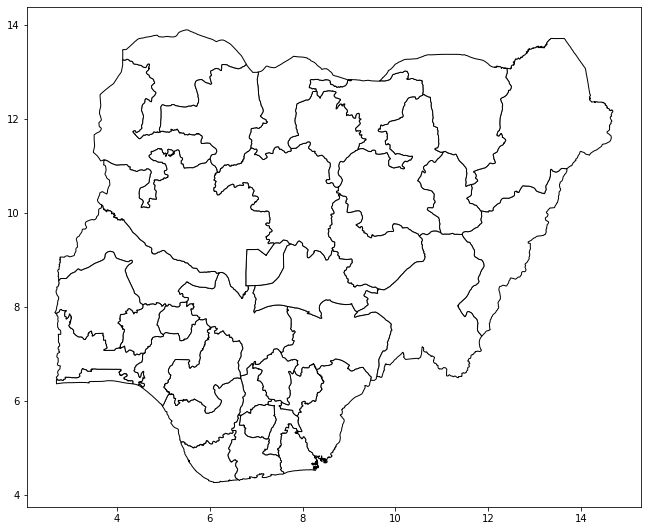

In [5]:
states_file = "nga_admbnda_osgof_eha_itos.gdb/nga_admbnda_osgof_eha_itos.gdb/nga_admbnda_osgof_eha_itos.gdb/nga_admbnda_osgof_eha_itos.gdb/"
# states_file = "data/geodata.gdb/"

# geopandas included map, filtered to just Nigeria
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.crs = "EPSG:4326"
nigeria = world[(world['name'] == 'Nigeria')]
base = nigeria.plot(color='white', edgecolor='black', alpha=0, figsize=(11, 11))

layers = fiona.listlayers(states_file)
zones_gdf = gpd.read_file(states_file, layer=1)
zones_gdf.crs = "EPSG:4326"
zones_gdf = zones_gdf.set_index('admin1Name_en')
zones_gdf.plot(ax=base, color='white', edgecolor='black')

Covid Data
----------

Now we have the health data, we’re going to combine it with [data about
COVID-19 cases in Nigeria over
time](https://github.com/dsfsi/covid19africa). This data is kindly
provided by Africa open COVID-19 data working group, which Elaine
Nsoesie has been working with. The data is taken from Twitter, and only
goes up until May 2020.

They provide their data in github. We can access the cases we’re
interested in from the following URL.

For convenience, we’ll load the data into pandas first, but our next
step will be to create a new SQLite table containing the data. Then
we’ll join that table to our existing tables.

In [6]:
import pandas as pd


covid_data_url = 'https://raw.githubusercontent.com/dsfsi/covid19africa/master/data/line_lists/line-list-nigeria.csv'
covid_data_csv = 'cases.csv'
urllib.request.urlretrieve(covid_data_url, covid_data_csv)
covid_data = pd.read_csv(covid_data_csv)

As normal, we should inspect our data to check that it contains what we
expect.

In [7]:
covid_data.head()

,case_id,origin_case_id,date,age,gender,city,province/state,country,current_status,source,symptoms,date_onset_symptoms,date_admission_hospital,date_confirmation,underlying_conditions,travel_history_dates,travel_history_location,death_date,notes_for_discussion,Unnamed: 19
0,1,NaN,2/27/2020,44,Male,Ogun,Ogun,Nigeria,In recovery,www.bbc.com,NaN,NaN,2/27/2020,27-Feb-20,No,NaN,Italy,NaN,Patient came in from Italy.,NaN
1,2,NaN,03/09/2020,NaN,NaN,Ogun,Ogun,Nigeria,In treatment,https://twitter.com/NCDCgov/status/12376418124...,NaN,03/09/2020,03/09/2020,03/09/2020,No,NaN,NaN,NaN,NaN,NaN
2,3,NaN,3/16/2020,30,Female,Lagos,Lagos,Nigeria,Clinically Stable,https://twitter.com/NCDCgov/status/12398485450...,"Fever, Cold, Cough",NaN,3/17/2020,3/17/2020,NaN,13-Mar-20,United Kingdom,NaN,Patient returned from trip to UK and was in 14...,NaN
3,4,NaN,3/16/2020,58,Male,Lagos,Lagos,Nigeria,NaN,https://twitter.com/NCDCgov/status/12405579967...,NaN,NaN,NaN,NaN,NaN,13-Mar-20,USA,NaN,Patient returned from travel to USA,NaN
4,5,NaN,3/16/2020,38,Female,NaN,Ekiti,Nigeria,NaN,https://twitter.com/NCDCgov/status/12405579967...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Patient made contact with traveler from the USA,NaN


And we can get an idea of all the information in the data from looking
at the columns.

In [8]:
covid_data.columns

Index(['case_id', 'origin_case_id', 'date', 'age', 'gender', 'city',
       'province/state', 'country', 'current_status', 'source', 'symptoms',
       'date_onset_symptoms', 'date_admission_hospital', 'date_confirmation',
       'underlying_conditions', 'travel_history_dates',
       'travel_history_location', 'death_date', 'notes_for_discussion',
       'Unnamed: 19'],
      dtype='object')

Now we convert this CSV file we’ve downloaded into a new table in the
database file. We can do this, again, with the csv-to-sqlite script.

In [9]:
!csv-to-sqlite -f cases.csv -t full -o db.sqlite

Error on table cases.csv: 
 table [cases] already exists
Written 0 rows into 1 tables in 0.026 seconds


Population Data
---------------

Now we have information about COVID cases, and we have information about
how many health centers and how many doctors and nurses there are in
each health center. But unless we understand how many people there are
in each state, then we cannot make decisions about where they may be
problems with the disease.

If we were running our ride hailing service, we would also need
information about how many people there were in different areas, so we
could understand what the *demand* for the boda boda rides might be.

To access the number of people we can get population statistics from the
[Humanitarian Data Exchange](https://data.humdata.org/).

We also want to have population data for each state in Nigeria, so that
we can see attributes like whether there are zones of high health
facility density but low population density.

In [10]:
pop_url = 'https://data.humdata.org/dataset/a7c3de5e-ff27-4746-99cd-05f2ad9b1066/resource/d9fc551a-b5e4-4bed-9d0d-b047b6961817/download/nga_pop_adm1_2016.csv'
_, msg = urllib.request.urlretrieve(pop_url,'nga_pop_adm1_2016.csv')
pop_data = pd.read_csv('nga_pop_adm1_2016.csv')

In [11]:
pop_data.head()

,admin1Name_en,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,Abia,NG001,Nigeria,NG,3644714
1,Borno,NG008,Nigeria,NG,5669054
2,Federal Capital Territory,NG015,Nigeria,NG,2996670
3,Akwa Ibom,NG003,Nigeria,NG,5353609
4,Ebonyi,NG011,Nigeria,NG,2819675


To do joins with this data, we must first make sure that the columns
have the right names. The name should match the same name of the column
in our existing data. So we reset the column names, and the name of the
index, as follows.

In [12]:
pop_data.columns = ['admin1Name_en', 'admin1Pcode', 'admin0Name_en', 'admin0Pcode', 'population']
pop_data = pop_data.set_index('admin1Name_en')

When doing this for real world data, you should also make sure that the
names used in the rows are the same across the different data bases. For
example, has someone decided to use an abbreviation for ‘Federal Capital
Territory’ and set it as ‘FCT’. The computer won’t understand these are
the same states, and if you do a join with such data you can get
duplicate entries or missing entries. This sort of thing happens a lot
in real world data and takes a lot of time to sort out. Fortunately, in
this case, the data is well curated and we don’t have these problems.

Computing per capita hospitals and COVID
----------------------------------------

The Minister of Health in Abuja may be interested in which states are
most vulnerable to COVID19. We now have all the information in our SQL
data bases to compute what our health center provision is per capita,
and what the COVID19 situation is.

To do this, we will use the `JOIN` operation from SQL and introduce a
new operation called `GROUPBY`.

#### Joining in Pandas

As before, these operations can be done in pandas or GeoPandas. Before
we create the SQL commands, we’ll show how you can do that in pandas.

In pandas, the equivalent of a database table is a dataframe. So the
JOIN operation takes two dataframes and joins them based on the key. The
key is that special shared column between the two tables. The place
where the ‘holes align’ so the two databases can be joined together.

In GeoPandas we used an outer join. In an outer join you keep all rows
from both tables, even if there is no match on the key. In an inner
join, you only keep the rows if the two tables have a matching key.

This is sometimes where problems can creep in. If in one table Abuja’s
state is encoded as ‘FCT’ or ‘FCT-Abuja’, and in another table it’s
encoded as ‘Federal Capital Territory’, they won’t match and that data
wouldn’t appear in the joined table.

In simple terms, a JOIN operation takes two tables (or dataframes) and
combines them based on some key, in this case the index of the Pandas
data frame which is the state name.

Great! We now have the data base in SQLite, and some python functions
that operate on the data base by wrapping SQL commands.

We will return to the SQL command style after download and add the other
datasets to the database using a combination of `pandas` and the
`csv-to-sqlite` utility.

Our next task will be to introduce data on COVID19 so that we can join
that to our other data sets.

In [13]:
pop_joined = zones_gdf.join(pop_data['population'], how='inner')

In [14]:
pop_joined.index

Index(['Abia', 'Adamawa', 'Akwa Ibom', 'Anambra', 'Bauchi', 'Bayelsa', 'Benue',
       'Borno', 'Cross River', 'Delta', 'Ebonyi', 'Edo', 'Ekiti', 'Enugu',
       'Federal Capital Territory', 'Gombe', 'Imo', 'Jigawa', 'Kaduna', 'Kano',
       'Katsina', 'Kebbi', 'Kogi', 'Kwara', 'Lagos', 'Nasarawa', 'Niger',
       'Ogun', 'Ondo', 'Osun', 'Oyo', 'Plateau', 'Rivers', 'Sokoto', 'Taraba',
       'Yobe', 'Zamfara'],
      dtype='object', name='admin1Name_en')

GroupBy in Pandas
-----------------

Our COVID19 data is in the form of individual cases. But we are
interested in total case counts for each state. There is a special data
base operation known as `GROUP BY` for collecting information about the
individual states. The type of information you might want could be a
sum, the maximum value, an average, the minimum value. We can use a
GroupBy operation in `pandas` and SQL to summarize the counts of covid
cases in each state.

A `GROUPBY` operation groups rows with the same key (in this case
‘province/state’) into separate objects, that we can operate on further
such as to count the rows in each group, or to sum or take the mean over
the values in some column (imagine each case row had the age of the
patient, and you were interested in the mean age of patients.)

In [15]:
covid_cases_by_state = covid_data.groupby(['province/state']).count()['case_id']

The `.groupby()` method on the dataframe has now given us a new data
series that contains the total number of covid cases in each state. We
can examine it to check we have something sensible.

In [16]:
covid_cases_by_state

province/state
Abia            5
Abuja         427
Adamawa        26
Akwa Ibom      18
Anambra         5
Bauchi        224
Bayelsa         7
Benue           5
Borno         227
Delta          27
Ebonyi         13
Edo           119
Ekiti          19
Enugu          16
Gombe         136
Imo             7
Jigawa        205
Kaduna        152
Kano          842
Katsina       281
Kebbi          32
Kwara          65
Lagos        2756
Nasarawa       34
Niger          22
Ogun          177
Ondo           20
Osun           42
Oyo           143
Plateau        50
Rivers         53
Sokoto        113
Taraba         17
Yobe           32
Zamfara        84
Name: case_id, dtype: int64

Now we have this new data series, it can be added to the pandas data
frame as a new column.

In [17]:
pop_joined['covid_cases_by_state'] = covid_cases_by_state

## Get in my data from pdfs

In [18]:
# get the giant df that was made from pdfs

import pandas as pd

giant_df = pd.read_csv('20200502_20200817_pdfs.csv')

# clean the index
giant_df.reset_index(drop=True)
giant_df.drop(giant_df.columns[0], axis=1, inplace=True)


# manual fixing of some rows
giant_df.iloc[1412,:] = 'Akwa Ibom', 48, 3, 17, 3, 2, 0, 29, '2020-06-13'
giant_df.iloc[2957,:] = 'FCT', 3560, 35, 1077, 13, 41, 0, 2442, '2020-07-28'
giant_df.iloc[2984,:] = 'Sokoto', 154, 0, 137, 90, 16, 0, 1, '2020-07-28'

giant_df.iloc[1494,:] = 'Lagos', 7461, 142, 1302, 165, 107, 25, 6052, '2020-06-16'
giant_df.iloc[2436,:] = 'Lagos', 12711, 128, 1935, 19, 175, 2, 10601, '2020-07-14'
giant_df.iloc[3550,:] = 'Lagos', 16369, 113, 14457, 1325, 201, 0, 1711, '2020-08-14'
giant_df.iloc[3587,:] = 'Lagos', 16456, 87, 14467, 10, 201, 0, 1788, '2020-08-15'
giant_df.loc[2771, 'new_deaths'] = 15



# convert date from string to date format
giant_df['date']= giant_df['date'].astype('datetime64[ns]')

# check information
giant_df.info()


# most entries are strings => convert into numeric

import numpy as np

for i in [1,2,3,5,6,7]:
    # print(i)
    giant_df.iloc[:,i] = giant_df.iloc[:,i].apply(lambda x: ''.join(ch for ch in str(x) if ch.isdigit()))
    giant_df.iloc[:,i] = pd.to_numeric(giant_df.iloc[:,i])
    # sub_df.iloc[:,i] = sub_df.iloc[:,i].apply(lambda x: int(x) if x else 'missing')
    
giant_df.info()
# why are total confirmed and new_confirmed floats ??



# fix state names
giant_df['state'] = giant_df['state'].apply(lambda x: 'Federal Capital Territory' if x == 'FCT' else x)
giant_df['state'] = giant_df['state'].apply(lambda x: 'Akwa Ibom' if x.startswith('Akwa') else x)
# giant_df['state'] = giant_df['state'].apply(lambda x: 'Cross River' if x == 'River' else x)
giant_df['state'] = giant_df['state'].apply(lambda x: 'Cross River' if x == 'Cross Rivers' else x)
giant_df = giant_df[giant_df['state'] != 'Ibom']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   state             3735 non-null   object        
 1   total_confirmed   3735 non-null   object        
 2   new_confirmed     3735 non-null   object        
 3   total_discharged  3735 non-null   object        
 4   new_dicharged     3735 non-null   int64         
 5   total_deaths      3735 non-null   object        
 6   new_deaths        3735 non-null   object        
 7   total_active      3735 non-null   object        
 8   date              3735 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 262.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3735 entries, 0 to 3734
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   state     

In [19]:
# get a list of dates - useful for iterating through them later

date_list = giant_df['date'].unique().tolist()
display(len(date_list))

# sort the list alphabetically - this just puts 2020-07-07 in its place
date_list = sorted(date_list)
# display(date_list)

# rev_date_list = sorted(date_list, reverse=True)
# print(rev_date_list)

103

In [34]:
# split into separate df's by date
# create a list of df's, ordered by date
# within each df, order rows by state alphabetically

groups = giant_df.groupby('date')

df_list = []
for date in date_list:
    df = groups.get_group(date)
    
    # within each df, order rows alphabetically by state
    df.sort_values(by=['state'], inplace=True)
            
    # make state the index, so we can merge with geo data
    df.set_index('state', drop=False, inplace=True)
    
    df.index.names = ['admin1Name_en']
    
    # merge with geo data
    df = zones_gdf.join(df, how='inner', on="admin1Name_en", rsuffix='right')
    
    
    df_list.append(df)
print(len(df_list))


<ipython-input-34-f4513878aee8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['state'], inplace=True)


103


## Join my pdf data to pop_joined

In [21]:
# wrong
# pop_joined_pdf = test_df.merge(pop_joined, how="right", left_on="admin1Name_en", right_on="admin1Name_en")

# if you only want a column
# pop_joined_pdf = zones_gdf.join(test_df['new_confirmed'], how='inner')

# join df's
# pop_joined_pdf = zones_gdf.join(test_df, how='inner', on="admin1Name_en", lsuffix='left')
# len(pop_joined_pdf)
# pop_joined_pdf.columns
# type(pop_joined_pdf)

## Plot

In [22]:
# plot total cases per state, scroll over time

import numpy as np
import matplotlib.pyplot as plt

# enables interactive plot in jupyter
%matplotlib notebook

# now the real code :)
# ie setting up scrolling

curr_pos = 0

def key_event(e):
    global curr_pos

    #if e.key == "right":
    if e.button == 'up':
        curr_pos = curr_pos + 1
        
    #elif e.key == "left":
    elif e.button == 'down':
        curr_pos = curr_pos - 1
    else:
        return
    curr_pos = curr_pos % len(plots)

    # clear the current axes, apparently
    ax.cla()
    
    # your plot
    base = nigeria.plot(color='white', edgecolor='black', alpha=0, figsize=(11, 11))
    df_list[curr_pos].plot(column='new_confirmed', ax=base, edgecolor='black', legend=True)
    base.set_title("New confirmed cases")
    
    fig.canvas.draw()
    fig = plt.figure()

    
# need to look into what exactly each one of these does
fig = plt.figure()


# your starting plot
# base = nigeria.plot(color='white', edgecolor='black', alpha=0, figsize=(7, 7))
# df_list[curr_pos].plot(column='new_confirmed', ax=base, edgecolor='black', legend=True)
# base.set_title("New confirmed cases")



fig.canvas.mpl_connect('scroll_event', key_event)
ax = fig.add_subplot(111)




# show plot
plt.show()

<IPython.core.display.Javascript object>

# Try bokeh

In [23]:
# %conda install -c bokeh bokeh

In [24]:
# make one giant df with all dates, merged with geo data

giant_geo = giant_df.copy()

# make state the index, so we can merge with geo data
giant_geo.set_index('state', drop=False, inplace=True)

giant_geo.index.names = ['admin1Name_en']

# merge with geo data
giant_geo = zones_gdf.join(giant_geo, how='inner', on="admin1Name_en", rsuffix='right')

# don't show h/min/s for date, just the y/m/d
giant_geo['date'] = pd.to_datetime(giant_geo['date']).dt.normalize()

giant_geo.sample(5)

,admin1Pcode,admin1RefName,admin1AltName1_en,admin1AltName2_en,admin0Name_en,admin0Pcode,date,validOn,validTo,Shape_Length,...,geometry,state,total_confirmed,new_confirmed,total_discharged,new_dicharged,total_deaths,new_deaths,total_active,dateright
admin1Name_en,,,,,,,,,,,,,,,,,,,,,
Enugu,NG014,Enugu,None,None,Nigeria,NG,2016-11-29,2016-12-15T00:00:00,None,4.319893,...,"MULTIPOLYGON (((7.54536 7.00125, 7.54930 6.991...",Enugu,16,0,6,0,0,0,10,2020-05-20
Ebonyi,NG011,Ebonyi,None,None,Nigeria,NG,2016-11-29,2016-12-15T00:00:00,None,4.489355,...,"MULTIPOLYGON (((8.24431 6.78560, 8.24976 6.775...",Ebonyi,36,3,6,0,0,0,30,2020-05-26
Imo,NG017,Imo,None,None,Nigeria,NG,2016-11-29,2016-12-15T00:00:00,None,2.878088,...,"MULTIPOLYGON (((7.26575 5.93081, 7.26607 5.927...",Imo,3,0,1,0,0,0,2,2020-05-10
Kaduna,NG019,Kaduna,None,None,Nigeria,NG,2016-11-29,2016-12-15T00:00:00,None,12.613678,...,"MULTIPOLYGON (((8.16953 11.48727, 8.16955 11.4...",Kaduna,369,6,230,20,10,0,129,2020-06-09
Kwara,NG024,Kwara,None,None,Nigeria,NG,2016-11-29,2016-12-15T00:00:00,None,12.046963,...,"MULTIPOLYGON (((3.73068 10.06829, 3.73651 10.0...",Kwara,217,0,128,0,6,0,83,2020-06-28


In [33]:
from bokeh.io import curdoc, output_notebook
from bokeh.models import Slider, HoverTool
from bokeh.layouts import widgetbox, row, column
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

import datetime

#Define function that returns json_data for year selected by user.

#df = giant_geo.copy()

def json_data(counter):
    df_counter = df_list[counter]
    df_counter_json = json.loads(df_counter.to_json())
    json_data = json.dumps(df_counter_json)
    return json_data

#Input GeoJSON source that contains features for plotting.
#geosource = GeoJSONDataSource(geojson = json_data(2016))

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40, nan_color = '#d9d9d9')

#Define custom tick labels for color bar.
#tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}

#Add hover tool
#hover = HoverTool(tooltips = [ ('Country/region','@country'),('% obesity', '@per_cent_obesity')])

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal') #, major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Covid-19 in Nigeria', plot_height = 600 , plot_width = 950, toolbar_location = None) #, tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
#p.patches('xs','ys', source = geosource,fill_color = {'field' :'per_cent_obesity', 'transform' : color_mapper},
#          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify layout
p.add_layout(color_bar, 'below')

# Define the callback function: update_plot
def update_plot(attr, old, new):
    counter = slider.value
    new_data = json_data(counter)
    geosource.geojson = new_data
    # p.title.text = 'Share of adults who are obese, %d' %yr
    
# Make a slider object: slider 

# start_date = datetime.datetime.strptime('2020-06-01', '%Y-%m-%d')
# end_date = date_time_str = datetime.datetime.strptime('2020-08-17', '%Y-%m-%d')

slider = Slider(title = 'scroll_number',start = 0, end = 5, step = 1, value = 0)
slider.on_change('value', update_plot)

# Make a column layout of widgetbox(slider) and plot, and add it to the current document
layout = column(p,widgetbox(slider))
curdoc().add_root(layout)

#Display plot inline in Jupyter notebook
output_notebook()

#Display plot
show(layout)

Loading BokehJS ...

You are generating standalone HTML/JS output, but trying to use real Python
callbacks (i.e. with on_change or on_event). This combination cannot work.

Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

    https://docs.bokeh.org/en/latest/docs/user_guide/server.html



In [ ]:
from bokeh.io import curdoc, output_notebook
from bokeh.models import Slider, HoverTool
from bokeh.layouts import widgetbox, row, column
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar
from bokeh.palettes import brewer

import datetime

#Define function that returns json_data for year selected by user.

#df = giant_geo.copy()

def json_data(counter):
    df_counter = df_list[counter]
    df_counter_json = json.loads(df_counter.to_json())
    json_data = json.dumps(df_counter_json)
    return json_data

#Input GeoJSON source that contains features for plotting.
#geosource = GeoJSONDataSource(geojson = json_data(2016))

#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]

#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]

#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40, nan_color = '#d9d9d9')

#Define custom tick labels for color bar.
#tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}

#Add hover tool
#hover = HoverTool(tooltips = [ ('Country/region','@country'),('% obesity', '@per_cent_obesity')])

#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal') #, major_label_overrides = tick_labels)

#Create figure object.
p = figure(title = 'Covid-19 in Nigeria', plot_height = 600 , plot_width = 950, toolbar_location = None) #, tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

#Add patch renderer to figure. 
#p.patches('xs','ys', source = geosource,fill_color = {'field' :'per_cent_obesity', 'transform' : color_mapper},
#          line_color = 'black', line_width = 0.25, fill_alpha = 1)

#Specify layout
p.add_layout(color_bar, 'below')

# Define the callback function: update_plot
def update_plot(attr, old, new):
    counter = slider.value
    new_data = json_data(counter)
    geosource.geojson = new_data
    # p.title.text = 'Share of adults who are obese, %d' %yr
    
# Make a slider object: slider 

# start_date = datetime.datetime.strptime('2020-06-01', '%Y-%m-%d')
# end_date = date_time_str = datetime.datetime.strptime('2020-08-17', '%Y-%m-%d')

slider = Slider(title = 'scroll_number',start = 0, end = 5, step = 1, value = 0)
slider.on_change('value', update_plot)

# Make a column layout of widgetbox(slider) and plot, and add it to the current document
layout = column(p,widgetbox(slider))
curdoc().add_root(layout)

#Display plot inline in Jupyter notebook
output_notebook()

#Display plot
show(layout)

In [ ]:
from bokeh.io import curdoc, output_notebook
from bokeh.models import Slider, HoverTool
from bokeh.layouts import widgetbox, row, column
#Define function that returns json_data for year selected by user.
    
def json_data(selectedYear):
    yr = selectedYear
    df_yr = df[df['year'] == yr]
    merged = gdf.merge(df_yr, left_on = 'country_code', right_on =     'code', how = 'left')
    merged.fillna('No data', inplace = True)
    merged_json = json.loads(merged.to_json())
    json_data = json.dumps(merged_json)
    return json_data
#Input GeoJSON source that contains features for plotting.
geosource = GeoJSONDataSource(geojson = json_data(2016))
#Define a sequential multi-hue color palette.
palette = brewer['YlGnBu'][8]
#Reverse color order so that dark blue is highest obesity.
palette = palette[::-1]
#Instantiate LinearColorMapper that linearly maps numbers in a range, into a sequence of colors. Input nan_color.
color_mapper = LinearColorMapper(palette = palette, low = 0, high = 40, nan_color = '#d9d9d9')
#Define custom tick labels for color bar.
tick_labels = {'0': '0%', '5': '5%', '10':'10%', '15':'15%', '20':'20%', '25':'25%', '30':'30%','35':'35%', '40': '>40%'}
#Add hover tool
hover = HoverTool(tooltips = [ ('Country/region','@country'),('% obesity', '@per_cent_obesity')])
#Create color bar. 
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal', major_label_overrides = tick_labels)
#Create figure object.
p = figure(title = 'Share of adults who are obese, 2016', plot_height = 600 , plot_width = 950, toolbar_location = None, tools = [hover])
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
p.patches('xs','ys', source = geosource,fill_color = {'field' :'per_cent_obesity', 'transform' : color_mapper},
          line_color = 'black', line_width = 0.25, fill_alpha = 1)
#Specify layout
p.add_layout(color_bar, 'below')
# Define the callback function: update_plot
def update_plot(attr, old, new):
    yr = slider.value
    new_data = json_data(yr)
    geosource.geojson = new_data
    p.title.text = 'Share of adults who are obese, %d' %yr
    
# Make a slider object: slider 
slider = Slider(title = 'Year',start = 1975, end = 2016, step = 1, value = 2016)
slider.on_change('value', update_plot)
# Make a column layout of widgetbox(slider) and plot, and add it to the current document
layout = column(p,widgetbox(slider))
curdoc().add_root(layout)
#Display plot inline in Jupyter notebook
output_notebook()
#Display plot
show(layout)

In [ ]:
base = nigeria.plot(color='white', edgecolor='black', alpha=0, figsize=(7, 7))
df_list[curr_pos].plot(column='new_confirmed', ax=base, edgecolor='black', legend=True)
base.set_title("New confirmed cases")


# also works:
# variable = 'population'
# pop_joined.plot(variable, ax=base, edgecolor='black', legend=True)

In [ ]:
display(pop_joined.info())
display(pop_joined_pdf.info())

Thanks!
-------

For more information on these subjects and more you might want to check
the following resources.

-   twitter: [@lawrennd](https://twitter.com/lawrennd)
-   podcast: [The Talking Machines](http://thetalkingmachines.com)
-   newspaper: [Guardian Profile
    Page](http://www.theguardian.com/profile/neil-lawrence)
-   blog:
    [http://inverseprobability.com](http://inverseprobability.com/blog.html)